In [1]:
import numpy as np
from sklearn import ensemble
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import seaborn as sns
import pickle


In [2]:
# #############################################################################
# Load data
#data = pd.read_csv('../../RealData/RealData.csv')
data = pd.read_csv('../../SynData/data/GeneratedData.csv')



In [3]:
# #############################################################################
# Training and Testing Data
X = data[['throughput']]
y = data['CPU']
X = X.fillna(X.mean())
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

n = len(X)
kf = KFold(n_splits=5)
fold = 0
for train_index, test_index in kf.split(X):
    fold += 1
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [4]:
# #############################################################################
# Fit regression model
params = {'n_estimators': [50, 100, 200], 'max_depth':[2, 4, 6], 'min_samples_split': [2, 4, 12],
          'learning_rate': [0.1, 0.01, 0.001], 'loss': ['ls', 'lad', 'huber', 'quantile']}
gb = ensemble.GradientBoostingRegressor()
clf = GridSearchCV(gb, params, verbose=1, n_jobs=-1)

clf.fit(X_train, y_train)
print(clf.best_params_)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 619 tasks      | elapsed:   16.0s


{'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 6, 'min_samples_split': 2, 'n_estimators': 100}


[Parallel(n_jobs=-1)]: Done 972 out of 972 | elapsed:   27.4s finished


In [5]:
prediction = clf.predict(X_test)
y_test = np.array(list(y_test))
prediction= np.array(prediction)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': prediction.flatten()})
df

,Actual,Predicted
0,0.518847,0.525603
1,0.456639,0.455172
2,0.471693,0.468258
3,0.363084,0.363228
4,0.234152,0.226975
5,0.732775,0.732201
6,0.812632,0.812625
7,0.969454,0.969420
8,0.723685,0.725282
9,0.949133,0.948168


In [6]:
#Model Evaluation
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))



MAE: 0.0025037097587564078
MSE: 1.1285579594623705e-05
RMSE: 0.00335940167211718


/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


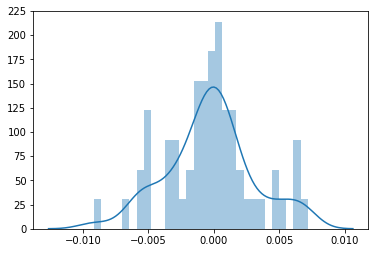

In [7]:
sns.distplot(y_test-prediction,bins=30)

In [8]:
# save the model to disk
filename = '../models/gradientBoostingReg_model.sav'
pickle.dump(clf, open(filename, 'wb'))

In [9]:
data = scaler.transform(np.float32([[10]])) 
print(data)

[[0.0966218]]


In [10]:
clf.predict([[.14847461]])

array([0.11034915])